## Studi Kasus Regresi Linier
- Prediksi penjualan benih yg dipengaruhi oleh promosi / iklan

In [1]:
# Deklarasi pustaka
import numpy as np # proses perhitungan numerik
import pandas as pd # proses manipulasi dataset
import matplotlib.pyplot as plt # visualisasi dataset

### Akuisisi Data

In [2]:
# membaca dataset
df = pd.read_csv("D:/Bahan Ajar Big Data/dataset/dataset_promosi_penjualan.csv", delimiter=";")

In [3]:
# menampilkan isi dataset
df

,promosi,penjualan,tahun
0,25,100,2001
1,27,105,2002
2,29,108,2003
3,30,109,2004
4,35,120,2005
5,50,145,2006
6,55,143,2007
7,60,150,2008
8,63,154,2009
9,65,157,2010


### Praproses Data

In [4]:
# Mengambil nilai X dan Y menjadi array (1 Dimensi)
X = df['promosi'].values
Y = df['penjualan'].values

In [5]:
print('X = '+str(X))
print('Y = '+str(Y))

X = [25 27 29 30 35 50 55 60 63 65 70 71 73 75 80]
Y = [100 105 108 109 120 145 143 150 154 157 161 170 174 176 180]


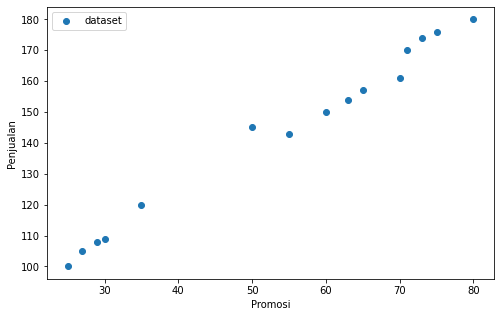

In [6]:
# Visualisasi data untuk melihat pola umum dataset

# menentukan lebar frame
fig, ax = plt.subplots(figsize = (8,5))

# plot scatter
ax.scatter(X, Y, label="dataset")

# memberikan keterangan pada sumbu x dan y
plt.xlabel('Promosi')
plt.ylabel('Penjualan')

# memberikan legenda
plt.legend()

# menampilkan plot
plt.show()

### Model Prediksi Regresi Linier

- rumus regresi Y = a + bX
- Y = hasil prediksi (variabel terikat)
- a = intercept
- b = slope
- X = koefisien regresi

In [7]:
# menentukan nilai a (intercept) dan b(slope)
mean_x = np.mean(X.copy())
mean_y = np.mean(Y.copy())

n = len(X)

num = 0
den = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    den += (X[i] - mean_x) ** 2

b1 = float(num) / float(den)
b0 = mean_y - (b1 * mean_x)

print('Mean promosi = '+str(mean_x))
print('Mean penjualan = '+str(mean_y))
print(b0, b1)

Mean promosi = 53.86666666666667
Mean penjualan = 143.46666666666667
66.99479949720258 1.4196509994331206


In [8]:
# proses regresi linier
max_x = np.max(X) + 10
min_x = np.min(X) - 10

x = np.linspace(min_x, max_x, 100)
y = b0 + b1 * x

### Visualisasi Data untuk melihat garis regresi linier

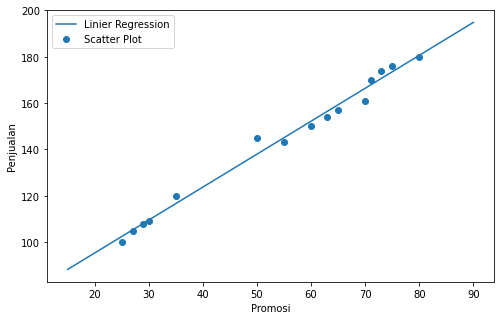

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x, y, label="Linier Regression") 
ax.scatter(X, Y, label="Scatter Plot")

plt.xlabel('Promosi')
plt.ylabel('Penjualan')
 
plt.legend()
plt.show()

### Evalusasi Regresi Linier

- persamaan regresi linier

In [10]:
df.head()

,promosi,penjualan,tahun
0,25,100,2001
1,27,105,2002
2,29,108,2003
3,30,109,2004
4,35,120,2005


In [11]:
# berapa nilai penjualan, apabila promosi nya 25, 27, 29, 30, 35
promosi = [25, 27, 29, 30, 35]

In [12]:
for i in range(len(promosi)):
    y = b0 + b1 * promosi[i]
    print("Jika nilai promosi " + str(promosi[i]) + " maka nilai penjualan {:.2f}".format(y))

Jika nilai promosi 25 maka nilai penjualan 102.49
Jika nilai promosi 27 maka nilai penjualan 105.33
Jika nilai promosi 29 maka nilai penjualan 108.16
Jika nilai promosi 30 maka nilai penjualan 109.58
Jika nilai promosi 35 maka nilai penjualan 116.68


- nilai rmse

In [13]:
# set nilai awal rmse
rmse = 0

# for loop untuk melihat berapa perbedaan antara hasil prediksi dengan data aktual
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2

# proses hitung nilai rmse    
rmse = np.sqrt(rmse/n)

# menampilkan nilai rmse
# semakin mendekati nilai 0, maka model prediksi semakin baik
print("RMSE = {:.4f}".format(rmse))

RMSE = 3.0431
